In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/enz-eff-project/
!pip install -r requirements_final.txt

/content/drive/.shortcut-targets-by-id/1iS6gSWfUE3cZnmrNWbbV9_W_zQH3vaiu/enz-eff-project
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 551.9/551.9 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 106.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 95.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 47.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.1/132.1 kB 24.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 120.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.2/101.2 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 6

In [23]:
%cd /content/drive/MyDrive/enz-eff-project/improved_code/model_training

from xgboost_funs import (
    find_best_params,
    train_xgboost,
    infer_xgboost,
    calculate_weighted_mean,
    evaluate_model,
)
import numpy as np
import pandas as pd
from os.path import join
import warnings

warnings.filterwarnings("ignore")


data_train = pd.read_pickle(
    join("..", "..", "data", "kcat_data", "splits", "train_df_kcat_new_feats.pkl")
)
data_test = pd.read_pickle(
    join("..", "..", "data", "kcat_data", "splits", "test_df_kcat_new_feats.pkl")
)



data_train.rename(columns={"geomean_kcat": "log10_kcat"}, inplace=True)
data_test.rename(columns={"geomean_kcat": "log10_kcat"}, inplace=True)


/content/drive/.shortcut-targets-by-id/1iS6gSWfUE3cZnmrNWbbV9_W_zQH3vaiu/enz-eff-project/improved_code/model_training


## 1. Training a model with only sequence information (ESM-1b):

In [ ]:
train_X = [data_train["ESM1b"]]
test_X = [data_test["ESM1b"]]

train_Y = data_train["log10_kcat"]
test_Y = data_test["log10_kcat"]

#### (a) Hyperparameter optimization:

In [ ]:
params_file = "xg_esm1b.txt"
find_best_params(train_X, train_Y, test_X, test_Y, params_file, max_evals=100)

#### (b) Training and validating model:

In [ ]:
param = {
    "learning_rate": 0.051447544749765035,
    "max_delta_step": 2.956459783615207,
    "max_depth": 5.034202474908222,
    "min_child_weight": 7.457989829577018,
    "num_rounds": 400.50601395689256,
    "reg_alpha": 1.0858835704466614,
    "reg_lambda": 1.1385559144302175,
}

model_name = "xg_esm1b"
train_xgboost(train_X, train_Y, test_X, test_Y, param, model_name)

XGBOOST training of xg_esm1b
xg_esm1b results: {'pearsonr': 0.62, 'r2': 0.38, 'mse': 0.82}


## 2. Training a model with only sequence information (ESM-1b_ts):

In [ ]:
train_X = [data_train["ESM1b_ts"]]
test_X = [data_test["ESM1b_ts"]]


train_Y = data_train["log10_kcat"]
test_Y = data_test["log10_kcat"]

#### (a) Hyperparameter optimization:

In [ ]:
params_file = "xg_esm1bts.txt"
find_best_params(train_X, train_Y, test_X, test_Y, params_file, max_evals=100)

#### (b) Training and validating model:

In [ ]:
param = {
    "learning_rate": 0.2831145406836757,
    "max_delta_step": 0.07686715986169101,
    "max_depth": 4.96836783761305,
    "min_child_weight": 6.905400087083855,
    "num_rounds": 313.1498988074061,
    "reg_alpha": 1.717314107718892,
    "reg_lambda": 2.470354543039016,
}

model_name = "xg_esm1bts"

train_xgboost(train_X, train_Y, test_X, test_Y, param, model_name)

XGBOOST training of xg_esm1bts
xg_esm1bts results: {'pearsonr': 0.63, 'r2': 0.4, 'mse': 0.81}


## 3. Training a model with only reaction information (DRFP):

In [ ]:
train_X = [data_train["DRFP"]]
test_X = [data_test["DRFP"]]

train_Y = data_train["log10_kcat"]
test_Y = data_test["log10_kcat"]


#### (a) Hyperparameter optimization:

In [ ]:
params_file = "xg_drfp.txt"
find_best_params(train_X, train_Y, test_X, test_Y, params_file, max_evals=100)

#### (b) Training and validating model:

In [ ]:
param = {
    "learning_rate": 0.1856224528757755,
    "max_delta_step": 0.5991129570939974,
    "max_depth": 10.797459148279001,
    "min_child_weight": 1.8963262708900501,
    "num_rounds": 135.7869104805833,
    "reg_alpha": 2.3321835446828603,
    "reg_lambda": 3.211896264556935,
}

model_name = "xg_drfp"

train_xgboost(train_X, train_Y, test_X, test_Y, param, model_name)

XGBOOST training of xg_drfp
xg_drfp results: {'pearsonr': 0.6, 'r2': 0.35, 'mse': 0.87}


## 4. Training a model with only reaction information (difference fingerprint):

In [ ]:
train_X = [data_train["difference_fp"]]
test_X = [data_test["difference_fp"]]

train_Y = data_train["log10_kcat"]
test_Y = data_test["log10_kcat"]

#### (a) Hyperparameter optimization:

In [ ]:
params_file = "xg_difference_fp.txt"
find_best_params(train_X, train_Y, test_X, test_Y, params_file, max_evals=100)

#### (b) Training and validating model:

In [ ]:
param = {'learning_rate': 0.14154883958006167,
         'max_delta_step': 0.02234358170535966,
         'max_depth': 10.869653004093198,
         'min_child_weight': 1.7936882442746056,
         'num_rounds': 361.6168542774665,
         'reg_alpha': 4.825525325323308,
         'reg_lambda': 2.74944090578774}


model_name = "xg_difference_fp"

train_xgboost(train_X, train_Y, test_X, test_Y, param, model_name)

XGBOOST training of xg_difference_fp
xg_difference_fp results: {'pearsonr': 0.62, 'r2': 0.36, 'mse': 0.85}


## 5. Training a model with only reaction information (structural fingerprint):

In [ ]:
train_X = [data_train["structural_fp"]]
test_X = [data_test["structural_fp"]]

train_Y = data_train["log10_kcat"]
test_Y = data_test["log10_kcat"]

#### (a) Hyperparameter optimization:

In [ ]:
params_file = "xg_structural_fp.txt"
find_best_params(train_X, train_Y, test_X, test_Y, params_file, max_evals=100)

#### (b) Training and validating model:

In [ ]:
param = {'learning_rate': 0.01126910440903659,
         'max_delta_step': 0.5777120839605732,
         'max_depth': 5.486901609313889,
         'min_child_weight': 6.14467742389769,
         'num_rounds': 488.943459090126,
         'reg_alpha': 4.629840853377147,
         'reg_lambda': 2.1047561335691745}


model_name = "xg_structural_fp"

train_xgboost(train_X, train_Y, test_X, test_Y, param, model_name)

XGBOOST training of xg_structural_fp
xg_structural_fp results: {'pearsonr': 0.57, 'r2': 0.31, 'mse': 0.92}


## 6. Training a model with enzyme and reaction information (ESM1b_ts/DRFP):

In [ ]:
train_X = [
  data_train["DRFP"],
  data_train["ESM1b_ts"]
  ]
test_X = [
  data_test["DRFP"],
  data_test["ESM1b_ts"]
  ]
train_Y = data_train["log10_kcat"]
test_Y = data_test["log10_kcat"]

#### (a) Hyperparameter optimization:

In [ ]:
params_file = "xg_esm1bts_drfp.txt"
find_best_params(train_X, train_Y, test_X, test_Y, params_file, max_evals=100)

#### (b) Training and validating model:

In [ ]:
param =  {
    'learning_rate': 0.0685249638804391,
    'max_depth': 9,
    'reg_lambda': 3.6231955480293934,
    'reg_alpha': 3.8923304126950957,
    'max_delta_step': 1.0371427260254895,
    'min_child_weight': 14.209819958496073,
    # 'sampling_method': 'gradient_based',
    'num_rounds': 400.9598325756988,
    }


model_name = "xg_esm1bts_drfp"

train_xgboost(train_X, train_Y, test_X, test_Y, param, model_name)


XGBOOST training of xg_esm1bts_drfp
xg_esm1bts_drfp results: {'pearsonr': 0.66, 'r2': 0.43, 'mse': 0.77}


## 7. Training a model with enzyme and reaction information (ESM1b_ts/diff_fp):

In [ ]:
train_X = [
  data_train["difference_fp"],
  data_train["ESM1b_ts"]
  ]
test_X = [
  data_test["difference_fp"],
  data_test["ESM1b_ts"]
  ]
train_Y = data_train["log10_kcat"]
test_Y = data_test["log10_kcat"]


#### (a) Hyperparameter optimization:

In [ ]:
params_file = "xg_esm1bts_diff.txt"
find_best_params(train_X, train_Y, test_X, test_Y, params_file, max_evals=100)

#### (b) Training and validating model:

In [ ]:
param = {
    'learning_rate': 0.15638876027725748,
    'max_depth': 8,
    'reg_lambda': 2.344616112944763,
    'reg_alpha': 4.262441473730964,
    'max_delta_step': 0.9349225200130806,
    'min_child_weight': 8.26447488212503,
    'num_rounds': 400.69265795096726,
    # 'sampling_method': 'gradient_based'
    }

model_name = "xg_esm1bts_diff"
train_xgboost(train_X, train_Y, test_X, test_Y, param, model_name)

XGBOOST training of xg_esm1bts_diff
xg_esm1bts_diff results: {'pearsonr': 0.64, 'r2': 0.41, 'mse': 0.79}


## 8. Training a model with enzyme and reaction information (ESM1b_ts/struct_fp):

In [ ]:
train_X = [
  data_train["structural_fp"],
  data_train["ESM1b_ts"]
  ]
test_X = [
  data_test["structural_fp"],
  data_test["ESM1b_ts"]
  ]
train_Y = data_train["log10_kcat"]
test_Y = data_test["log10_kcat"]


#### (a) Hyperparameter optimization:

In [ ]:
params_file = "xg_esm1bts_struct.txt"
find_best_params(train_X, train_Y, test_X, test_Y, params_file, max_evals=100)

 13%|█▎        | 13/100 [04:16<34:53, 24.06s/trial, best loss: -0.3319320010969849]

#### (b) Training and validating model:

In [ ]:
param = {
    'learning_rate': 0.15638876027725748,
    'max_depth': 8,
    'reg_lambda': 2.344616112944763,
    'reg_alpha': 4.262441473730964,
    'max_delta_step': 0.9349225200130806,
    'min_child_weight': 8.26447488212503,
    'num_rounds': 400.69265795096726,
    # 'sampling_method': 'gradient_based'
    }

model_name = "xg_esm1bts_struct"
train_xgboost(train_X, train_Y, test_X, test_Y, param, model_name)

XGBOOST training of xg_esm1bts_struct
xg_esm1bts_struct results: {'pearsonr': 0.65, 'r2': 0.42, 'mse': 0.78}


## 9. Training a model with enzyme and reaction information (ESM1b_ts/new_feats):

In [ ]:

train_X = [
    data_train["ESM1b_ts"],
    data_train["maccs_keys_combined"],
    data_train["chemical_descriptors_combined"],
    data_train["aa_composition_combined"],
    data_train["dp_composition_combined"],
    data_train["moreau_broto_auto_combined"],
    data_train["moran_auto_combined"],
    data_train["geary_auto_combined"],
    data_train["ctd_combined"],
    data_train["paac_combined"],
    data_train["traid_combined"],
]

test_X = [
    data_test["ESM1b_ts"],
    data_test["maccs_keys_combined"],
    data_test["chemical_descriptors_combined"],
    data_test["aa_composition_combined"],
    data_test["dp_composition_combined"],
    data_test["moreau_broto_auto_combined"],
    data_test["moran_auto_combined"],
    data_test["geary_auto_combined"],
    data_test["ctd_combined"],
    data_test["paac_combined"],
    data_test["traid_combined"],
]


train_Y = data_train["log10_kcat"]
test_Y = data_test["log10_kcat"]

#### (a) Hyperparameter optimization:

In [ ]:
params_file = "xg_esm1bts_all_feats.txt"

find_best_params(train_X, train_Y, test_X, test_Y, params_file, max_evals=50)

#### (b) Training and validating model:

In [ ]:
param = {
    "learning_rate": 0.050310919498210774,
    "max_delta_step": 4.3319939235068015,
    "max_depth": 7.386807960061238,
    "min_child_weight": 8.089511026239812,
    "num_rounds": 191.69825036370207,
    "reg_alpha": 4.573526295380227,
    "reg_lambda": 1.8133068017829785,
}


model_name = "xg_esm1bts_all_feats"

train_xgboost(train_X, train_Y, test_X, test_Y, param, model_name)

XGBOOST training of xg_esm1bts_all_feats
xg_esm1bts_all_feats results: {'pearsonr': 0.62, 'r2': 0.38, 'mse': 0.83}


## 10. Training a model with enzyme and reaction information (ESM1b_ts*ESM1b/new_feats):

In [ ]:
train_X = [
    data_train["ESM1b_ts"]*data_train["ESM1b"],
    data_train["maccs_keys_combined"],
    data_train["chemical_descriptors_combined"],
    data_train["aa_composition_combined"],
    data_train["dp_composition_combined"],
    data_train["moreau_broto_auto_combined"],
    data_train["moran_auto_combined"],
    data_train["geary_auto_combined"],
    data_train["ctd_combined"],
    data_train["paac_combined"],
    data_train["traid_combined"],
]

test_X = [
    data_test["ESM1b_ts"]*data_test["ESM1b"],
    data_test["maccs_keys_combined"],
    data_test["chemical_descriptors_combined"],
    data_test["aa_composition_combined"],
    data_test["dp_composition_combined"],
    data_test["moreau_broto_auto_combined"],
    data_test["moran_auto_combined"],
    data_test["geary_auto_combined"],
    data_test["ctd_combined"],
    data_test["paac_combined"],
    data_test["traid_combined"],
]


train_Y = data_train["log10_kcat"]
test_Y = data_test["log10_kcat"]



#### (a) Hyperparameter optimization:

In [ ]:
params_file = "xg_esm1b_esm1bts_all_feats.txt"

find_best_params(train_X, train_Y, test_X, test_Y, params_file, max_evals=50)

#### (b) Training and validating model:

In [ ]:
param = {
    "learning_rate": 0.10733137257229984,
    "max_delta_step": 2.1506214487681534,
    "max_depth": 5.327256510019331,
    "min_child_weight": 6.7213003584165625,
    "num_rounds": 195.96603536489076,
    "reg_alpha": 0.8975015244323159,
    "reg_lambda": 2.035710679749507,
}


model_name = "xg_esm1b_esm1bts_all_feats"

train_xgboost(train_X, train_Y, test_X, test_Y, param, model_name)

## 11. Training a model with enzyme and reaction information (ESM1b_ts*ESM1b):

In [ ]:

train_X = [
    data_train["ESM1b_ts"]*data_train["ESM1b"],
]

test_X = [
    data_test["ESM1b_ts"]*data_test["ESM1b"],
]


train_Y = data_train["log10_kcat"]
test_Y = data_test["log10_kcat"]


#### (a) Hyperparameter optimization:

In [ ]:
params_file = "xg_esm1b_esm1bts_combined.txt"

find_best_params(train_X, train_Y, test_X, test_Y, params_file, max_evals=100)

Index(['Reaction ID', 'Sequence ID', 'kcat_values', 'Uniprot IDs',
       'from_BRENDA', 'from_Sabio', 'from_Uniprot', 'checked', 'Sequence',
       'substrates',
       ...
       'socn_normalized', 'qso_combined', 'qso_normalized', 'traid_combined',
       'traid_normalized', 'paac_combined', 'paac_normalized', 'ESM1b_norm',
       'ESM1b_ts_norm', 'log10_kcat_norm'],
      dtype='object', length=2302)
R2 score: 
0.12907047575798988
R2 score: 
0.25577627481615267
R2 score: 
-0.07475618349073945
R2 score: 
0.04679192498308291
R2 score: 
0.26629132225671315
R2 score: 
0.19112179374574906
R2 score: 
0.15927577000753396
R2 score: 
-0.016196699868077546
R2 score: 
0.27968726605532057
R2 score: 
0.2287871036555303
R2 score: 
0.3062740475949763
R2 score: 
0.12831343253883493
R2 score: 
0.05118464887363809
R2 score: 
0.12496278566391869
R2 score: 
0.2245865001681032
R2 score: 
0.11958214311301604
R2 score: 
0.3069437243309442
R2 score: 
0.04968308239245813
R2 score: 
0.25464231859259295
R2 s

#### (b) Training and validating model:

In [ ]:
param = {
    "learning_rate": 0.07332193563988974,
    "max_delta_step": 4.341142499403841,
    "max_depth": 5.139364293216448,
    "min_child_weight": 8.246432022659084,
    "num_rounds": 186.72555889321325,
    "reg_alpha": 3.1095131693922964,
    "reg_lambda": 2.3336437518147,
}


model_name = "xg_esm1b_esm1bts_combined"

train_xgboost(train_X, train_Y, test_X, test_Y, param, model_name)

XGBOOST training of xg_esm1b_esm1bts_combined
xg_esm1b_esm1bts_combined results: {'pearsonr': 0.63, 'r2': 0.39, 'mse': 0.81}
model path:  /content/drive/MyDrive/enz-eff-project/models/train_models/xg_boost/xg_esm1b_esm1bts_combined.h5


**bold text**## 11. Training a model with enzyme and reaction information (ESM1b_ts/DRFP/new_feats):

In [ ]:
train_X = [
    data_train["DRFP"],
    data_train["ESM1b_ts"],
    data_train["maccs_keys_combined"],
    data_train["chemical_descriptors_combined"],
    data_train["aa_composition_combined"],
    data_train["dp_composition_combined"],
    data_train["moreau_broto_auto_combined"],
    data_train["moran_auto_combined"],
    data_train["geary_auto_combined"],
    data_train["ctd_combined"],
    data_train["paac_combined"],
    data_train["traid_combined"],
]

test_X = [
    data_test["DRFP"],
    data_test["ESM1b_ts"],
    data_test["maccs_keys_combined"],
    data_test["chemical_descriptors_combined"],
    data_test["aa_composition_combined"],
    data_test["dp_composition_combined"],
    data_test["moreau_broto_auto_combined"],
    data_test["moran_auto_combined"],
    data_test["geary_auto_combined"],
    data_test["ctd_combined"],
    data_test["paac_combined"],
    data_test["traid_combined"],
]


train_Y = data_train["log10_kcat"]
test_Y = data_test["log10_kcat"]

#### (a) Hyperparameter optimization:

In [ ]:
params_file = "xg_esm1bts_drfp_all_feats.txt"

find_best_params(train_X, train_Y, test_X, test_Y, params_file, max_evals=50)

100%|██████████| 50/50 [35:07<00:00, 42.14s/trial, best loss: -0.30480860352144706]
Best hyperparameters: {'learning_rate': 0.03172884640394342, 'max_delta_step': 2.079418896374304, 'max_depth': 8.584579057666017, 'min_child_weight': 3.9650820764566928, 'num_rounds': 172.88865812808825, 'reg_alpha': 2.8139220261388607, 'reg_lambda': 0.3723441994423399}


#### (b) Training and validating model:

In [ ]:
param = {'learning_rate': 0.03172884640394342, 'max_delta_step': 2.079418896374304, 'max_depth': 8.584579057666017, 'min_child_weight': 3.9650820764566928, 'num_rounds': 172.88865812808825, 'reg_alpha': 2.8139220261388607, 'reg_lambda': 0.3723441994423399}



model_name = "xg_esm1bts_drfp_all_feats"

train_xgboost(train_X, train_Y, test_X, test_Y, param, model_name)

XGBOOST training of xg_esm1bts_drfp_all_feats
xg_esm1bts_drfp_all_feats results: {'pearsonr': 0.66, 'r2': 0.41, 'mse': 0.79}


## 12. Training a model with enzyme and reaction information (ESM1b_ts/diff/new_feats):

In [ ]:
train_X = [
    data_train["difference_fp"],
    data_train["ESM1b_ts"],
    data_train["maccs_keys_combined"],
    data_train["chemical_descriptors_combined"],
    data_train["aa_composition_combined"],
    data_train["dp_composition_combined"],
    data_train["moreau_broto_auto_combined"],
    data_train["moran_auto_combined"],
    data_train["geary_auto_combined"],
    data_train["ctd_combined"],
    data_train["paac_combined"],
    data_train["traid_combined"],
]

test_X = [
    data_test["difference_fp"],
    data_test["ESM1b_ts"],
    data_test["maccs_keys_combined"],
    data_test["chemical_descriptors_combined"],
    data_test["aa_composition_combined"],
    data_test["dp_composition_combined"],
    data_test["moreau_broto_auto_combined"],
    data_test["moran_auto_combined"],
    data_test["geary_auto_combined"],
    data_test["ctd_combined"],
    data_test["paac_combined"],
    data_test["traid_combined"],
]


train_Y = data_train["log10_kcat"]
test_Y = data_test["log10_kcat"]



#### (a) Hyperparameter optimization:

In [ ]:
params_file = "xg_esm1bts_diff_all_feats.txt"

find_best_params(train_X, train_Y, test_X, test_Y, params_file, max_evals=50)

100%|██████████| 50/50 [26:27<00:00, 31.75s/trial, best loss: -0.32119255838292843]
Best hyperparameters: {'learning_rate': 0.10367185906357922, 'max_delta_step': 2.6463403489177746, 'max_depth': 5.269171062746408, 'min_child_weight': 8.944283894371445, 'num_rounds': 148.45487205404805, 'reg_alpha': 2.264784403433291, 'reg_lambda': 4.583061652435041}


#### (b) Training and validating model:

In [ ]:
param = {'learning_rate': 0.10367185906357922, 'max_delta_step': 2.6463403489177746, 'max_depth': 5.269171062746408, 'min_child_weight': 8.944283894371445, 'num_rounds': 148.45487205404805, 'reg_alpha': 2.264784403433291, 'reg_lambda': 4.583061652435041}


model_name = "xg_esm1bts_diff_all_feats"

train_xgboost(train_X, train_Y, test_X, test_Y, param, model_name)

XGBOOST training of xg_esm1bts_diff_all_feats
xg_esm1bts_diff_all_feats results: {'pearsonr': 0.64, 'r2': 0.41, 'mse': 0.79}


## 13. Training a model with enzyme and reaction information (ESM1b_ts/struct/new_feats):

In [ ]:
train_X = [
    data_train["structural_fp"],
    data_train["ESM1b_ts"],
    data_train["maccs_keys_combined"],
    data_train["chemical_descriptors_combined"],
    data_train["aa_composition_combined"],
    data_train["dp_composition_combined"],
    data_train["moreau_broto_auto_combined"],
    data_train["moran_auto_combined"],
    data_train["geary_auto_combined"],
    data_train["ctd_combined"],
    data_train["paac_combined"],
    data_train["traid_combined"],
]

test_X = [
    data_test["structural_fp"],
    data_test["ESM1b_ts"],
    data_test["maccs_keys_combined"],
    data_test["chemical_descriptors_combined"],
    data_test["aa_composition_combined"],
    data_test["dp_composition_combined"],
    data_test["moreau_broto_auto_combined"],
    data_test["moran_auto_combined"],
    data_test["geary_auto_combined"],
    data_test["ctd_combined"],
    data_test["paac_combined"],
    data_test["traid_combined"],
]


train_Y = data_train["log10_kcat"]
test_Y = data_test["log10_kcat"]



#### (a) Hyperparameter optimization:

In [ ]:
params_file = "xg_esm1bts_struct_all_feats.txt"

find_best_params(train_X, train_Y, test_X, test_Y, params_file, max_evals=50)

100%|██████████| 50/50 [30:20<00:00, 36.40s/trial, best loss: -0.345022552582513]
Best hyperparameters: {'learning_rate': 0.12647625185713532, 'max_delta_step': 1.8537274794406327, 'max_depth': 9.018156162706058, 'min_child_weight': 2.191786023090298, 'num_rounds': 73.57522915799424, 'reg_alpha': 3.3148793660966813, 'reg_lambda': 0.8862312516326953}


#### (b) Training and validating model:

In [ ]:
param = {'learning_rate': 0.12647625185713532, 'max_delta_step': 1.8537274794406327, 'max_depth': 9.018156162706058, 'min_child_weight': 2.191786023090298, 'num_rounds': 73.57522915799424, 'reg_alpha': 3.3148793660966813, 'reg_lambda': 0.8862312516326953}


model_name = "xg_esm1bts_struct_all_feats"

train_xgboost(train_X, train_Y, test_X, test_Y, param, model_name)

XGBOOST training of xg_esm1bts_struct_all_feats
xg_esm1bts_struct_all_feats results: {'pearsonr': 0.63, 'r2': 0.39, 'mse': 0.82}


## 14. Training a model with enzyme and reaction information (ESM1b/DRFP/new_feats):

In [ ]:
train_X = [
    data_train["DRFP"],
    data_train["ESM1b"],
    data_train["maccs_keys_combined"],
    data_train["chemical_descriptors_combined"],
    data_train["aa_composition_combined"],
    data_train["dp_composition_combined"],
    data_train["moreau_broto_auto_combined"],
    data_train["moran_auto_combined"],
    data_train["geary_auto_combined"],
    data_train["ctd_combined"],
    data_train["paac_combined"],
    data_train["traid_combined"],
]

test_X = [
    data_test["DRFP"],
    data_test["ESM1b"],
    data_test["maccs_keys_combined"],
    data_test["chemical_descriptors_combined"],
    data_test["aa_composition_combined"],
    data_test["dp_composition_combined"],
    data_test["moreau_broto_auto_combined"],
    data_test["moran_auto_combined"],
    data_test["geary_auto_combined"],
    data_test["ctd_combined"],
    data_test["paac_combined"],
    data_test["traid_combined"],
]


train_Y = data_train["log10_kcat"]
test_Y = data_test["log10_kcat"]



#### (a) Hyperparameter optimization:

In [ ]:
params_file = "xg_esm1b_drfp_all_feats.txt"

find_best_params(train_X, train_Y, test_X, test_Y, params_file, max_evals=50)

#### (b) Training and validating model:

In [ ]:
param = {'learning_rate': 0.09074813228178222, 'max_delta_step': 4.351380012147098, 'max_depth': 10.85278190500647, 'min_child_weight': 14.132860361264441, 'num_rounds': 97.7536746698916, 'reg_alpha': 2.2683115529653204, 'reg_lambda': 4.117303689836086}


model_name = "xg_esm1b_drfp_all_feats"

train_xgboost(train_X, train_Y, test_X, test_Y, param, model_name)

XGBOOST training of xg_esm1b_drfp_all_feats
xg_esm1b_drfp_all_feats results: {'pearsonr': 0.62, 'r2': 0.39, 'mse': 0.82}


## 15. Training a model with enzyme and reaction information (ESM1b/difference_fp/new_feats):

In [ ]:
train_X = [
    data_train["difference_fp"],
    data_train["ESM1b"],
    data_train["maccs_keys_combined"],
    data_train["chemical_descriptors_combined"],
    data_train["aa_composition_combined"],
    data_train["dp_composition_combined"],
    data_train["moreau_broto_auto_combined"],
    data_train["moran_auto_combined"],
    data_train["geary_auto_combined"],
    data_train["ctd_combined"],
    data_train["paac_combined"],
    data_train["traid_combined"],
]

test_X = [
    data_test["difference_fp"],
    data_test["ESM1b"],
    data_test["maccs_keys_combined"],
    data_test["chemical_descriptors_combined"],
    data_test["aa_composition_combined"],
    data_test["dp_composition_combined"],
    data_test["moreau_broto_auto_combined"],
    data_test["moran_auto_combined"],
    data_test["geary_auto_combined"],
    data_test["ctd_combined"],
    data_test["paac_combined"],
    data_test["traid_combined"],
]


train_Y = data_train["log10_kcat"]
test_Y = data_test["log10_kcat"]

#### (a) Hyperparameter optimization:

In [ ]:
params_file = "xg_esm1b_diff_all_feats.txt"

find_best_params(train_X, train_Y, test_X, test_Y, params_file, max_evals=50)

#### (b) Training and validating model:

In [ ]:
param = {'learning_rate': 0.13416290227362154, 'max_delta_step': 2.3391917035419807, 'max_depth': 6.231944708543701, 'min_child_weight': 0.8247034795589621, 'num_rounds': 157.09345290628443, 'reg_alpha': 2.73926682748925, 'reg_lambda': 2.877676700893586}

model_name = "xg_esm1b_diff_all_feats"

train_xgboost(train_X, train_Y, test_X, test_Y, param, model_name)

XGBOOST training of xg_esm1b_diff_all_feats
xg_esm1b_diff_all_feats results: {'pearsonr': 0.65, 'r2': 0.42, 'mse': 0.78}


## 16. Training a model with enzyme and reaction information (ESM1b/struct/new_feats):

In [ ]:
train_X = [
    data_train["structural_fp"],
    data_train["ESM1b"],
    data_train["maccs_keys_combined"],
    data_train["chemical_descriptors_combined"],
    data_train["aa_composition_combined"],
    data_train["dp_composition_combined"],
    data_train["moreau_broto_auto_combined"],
    data_train["moran_auto_combined"],
    data_train["geary_auto_combined"],
    data_train["ctd_combined"],
    data_train["paac_combined"],
    data_train["traid_combined"],
]

test_X = [
    data_test["structural_fp"],
    data_test["ESM1b"],
    data_test["maccs_keys_combined"],
    data_test["chemical_descriptors_combined"],
    data_test["aa_composition_combined"],
    data_test["dp_composition_combined"],
    data_test["moreau_broto_auto_combined"],
    data_test["moran_auto_combined"],
    data_test["geary_auto_combined"],
    data_test["ctd_combined"],
    data_test["paac_combined"],
    data_test["traid_combined"],
]


train_Y = data_train["log10_kcat"]
test_Y = data_test["log10_kcat"]



#### (a) Hyperparameter optimization:

In [ ]:
params_file = "xg_esm1b_struct_all_feats.txt"

find_best_params(train_X, train_Y, test_X, test_Y, params_file, max_evals=50)

#### (b) Training and validating model:

In [ ]:
param = {'learning_rate': 0.18306064138973785, 'max_delta_step': 0.45763598994368326, 'max_depth': 9.643544393895704, 'min_child_weight': 4.049585906711837, 'num_rounds': 176.77336555820568, 'reg_alpha': 1.2468676993811256, 'reg_lambda': 4.144851309451931}



model_name = "xg_esm1b_struct_all_feats"

train_xgboost(train_X, train_Y, test_X, test_Y, param, model_name)

XGBOOST training of xg_esm1b_struct_all_feats
xg_esm1b_struct_all_feats results: {'pearsonr': 0.66, 'r2': 0.43, 'mse': 0.76}


## Ensemble Xgboost

In [4]:
%cd /content/drive/MyDrive/enz-eff-project/models/train_models/xg_boost


# model-1
test_X = [data_test["ESM1b"]]
test_Y = data_test["log10_kcat"]
esm1b_preds = infer_xgboost(test_X, test_Y, "xg_esm1b.h5")

# model-2
test_X = [data_test["ESM1b_ts"]]
esm1bts_preds = infer_xgboost(test_X, test_Y, "xg_esm1bts.h5")
# model-3
test_X = [data_test["DRFP"]]
drfp_preds = infer_xgboost(test_X, test_Y, "xg_drfp.h5")
# model-4
test_X = [data_test["difference_fp"]]
diff_preds = infer_xgboost(test_X, test_Y, "xg_difference_fp.h5")
# model-5
test_X = [data_test["structural_fp"]]
struct_preds = infer_xgboost(test_X, test_Y, "xg_structural_fp.h5")
# model-6
test_X = [data_test["difference_fp"], data_test["ESM1b_ts"]]
esm1bts_diff_preds = infer_xgboost(test_X, test_Y, "xg_esm1bts_diff.h5")
# model-7
test_X = [data_test["DRFP"], data_test["ESM1b_ts"]]
esm1bts_drfp_preds = infer_xgboost(test_X, test_Y, "xg_esm1bts_drfp.h5")
# model-8
test_X = [
    data_test["ESM1b_ts"],
    data_test["maccs_keys_combined"],
    data_test["chemical_descriptors_combined"],
    data_test["aa_composition_combined"],
    data_test["dp_composition_combined"],
    data_test["moreau_broto_auto_combined"],
    data_test["moran_auto_combined"],
    data_test["geary_auto_combined"],
    data_test["ctd_combined"],
    data_test["paac_combined"],
    data_test["traid_combined"],
]
esm1bts_all_new_feats_preds = infer_xgboost(test_X, test_Y, "xg_esm1bts_all_feats.h5")



# model-9
test_X = [
    data_test["ESM1b_ts"] * data_test["ESM1b"],
    data_test["maccs_keys_combined"],
    data_test["chemical_descriptors_combined"],
    data_test["aa_composition_combined"],
    data_test["dp_composition_combined"],
    data_test["moreau_broto_auto_combined"],
    data_test["moran_auto_combined"],
    data_test["geary_auto_combined"],
    data_test["ctd_combined"],
    data_test["paac_combined"],
    data_test["traid_combined"],
]

esm1bts_esm1b_combined_all_feats_preds = infer_xgboost(
    test_X, test_Y, "xg_esm1b_esm1bts_all_feats.h5"
)


# model-10
test_X = [
    data_test["difference_fp"],
    data_test["ESM1b_ts"],
    data_test["maccs_keys_combined"],
    data_test["chemical_descriptors_combined"],
    data_test["aa_composition_combined"],
    data_test["dp_composition_combined"],
    data_test["moreau_broto_auto_combined"],
    data_test["moran_auto_combined"],
    data_test["geary_auto_combined"],
    data_test["ctd_combined"],
    data_test["paac_combined"],
    data_test["traid_combined"],
]
esm1bts_diff_all_feats_preds = infer_xgboost(
    test_X, test_Y, "xg_esm1bts_diff_all_feats.h5"
)




# model-11
test_X = [data_test["ESM1b_ts"]*data_test["ESM1b"],]

esm1b_esm1bts_combined_preds = infer_xgboost(
    test_X, test_Y, "xg_esm1b_esm1bts_combined.h5"
    )


# model-12
test_X = [data_test["structural_fp"], data_test["ESM1b_ts"]]
esm1bts_struct_preds = infer_xgboost(test_X, test_Y, "xg_esm1bts_struct.h5")

# model-13
test_X = [
    data_test["structural_fp"],
    data_test["ESM1b_ts"],
    data_test["maccs_keys_combined"],
    data_test["chemical_descriptors_combined"],
    data_test["aa_composition_combined"],
    data_test["dp_composition_combined"],
    data_test["moreau_broto_auto_combined"],
    data_test["moran_auto_combined"],
    data_test["geary_auto_combined"],
    data_test["ctd_combined"],
    data_test["paac_combined"],
    data_test["traid_combined"],
]

esm1bts_struct_all_feats_preds = infer_xgboost(test_X, test_Y, "xg_esm1bts_struct_all_feats.h5")


# model-14
test_X = [
    data_test["DRFP"],
    data_test["ESM1b"],
    data_test["maccs_keys_combined"],
    data_test["chemical_descriptors_combined"],
    data_test["aa_composition_combined"],
    data_test["dp_composition_combined"],
    data_test["moreau_broto_auto_combined"],
    data_test["moran_auto_combined"],
    data_test["geary_auto_combined"],
    data_test["ctd_combined"],
    data_test["paac_combined"],
    data_test["traid_combined"],
]

esm1b_drfp_all_feats_preds = infer_xgboost(test_X, test_Y, "xg_esm1b_drfp_all_feats.h5")

# model-15
test_X = [
    data_test["difference_fp"],
    data_test["ESM1b"],
    data_test["maccs_keys_combined"],
    data_test["chemical_descriptors_combined"],
    data_test["aa_composition_combined"],
    data_test["dp_composition_combined"],
    data_test["moreau_broto_auto_combined"],
    data_test["moran_auto_combined"],
    data_test["geary_auto_combined"],
    data_test["ctd_combined"],
    data_test["paac_combined"],
    data_test["traid_combined"],
]

esm1b_diff_all_feats_preds = infer_xgboost(test_X, test_Y, "xg_esm1b_diff_all_feats.h5")



# model-16
test_X = [
    data_test["structural_fp"],
    data_test["ESM1b"],
    data_test["maccs_keys_combined"],
    data_test["chemical_descriptors_combined"],
    data_test["aa_composition_combined"],
    data_test["dp_composition_combined"],
    data_test["moreau_broto_auto_combined"],
    data_test["moran_auto_combined"],
    data_test["geary_auto_combined"],
    data_test["ctd_combined"],
    data_test["paac_combined"],
    data_test["traid_combined"],
]
esm1b_struct_all_feats_preds = infer_xgboost(test_X, test_Y, "xg_esm1b_struct_all_feats.h5")


combined_weighted_preds = np.array(
    [
        esm1b_preds, # 0.38
        esm1bts_preds, # 0.4
        drfp_preds, # 0.35
        diff_preds, # 0.36
        struct_preds, # 0.31
        esm1bts_diff_preds, # 0.41
        esm1bts_drfp_preds, # 0.43
        esm1bts_struct_preds, # 0.42
        esm1bts_all_new_feats_preds, # 0.38
        esm1bts_esm1b_combined_all_feats_preds, # 0.39
        esm1bts_diff_all_feats_preds, # 0.41
        esm1bts_struct_all_feats_preds, # 0.39
        esm1b_diff_all_feats_preds, # 0.42
        esm1b_drfp_all_feats_preds, # 0.39
        esm1b_struct_all_feats_preds, # 0.43
        esm1b_esm1bts_combined_preds, # 0.39
    ]
)



weighted_avg_pred = calculate_weighted_mean(combined_weighted_preds, test_Y)
print(f"ensemble output: {evaluate_model(weighted_avg_pred, test_Y)}")


/content/drive/.shortcut-targets-by-id/1iS6gSWfUE3cZnmrNWbbV9_W_zQH3vaiu/enz-eff-project/models/train_models/xg_boost
ensemble output: {'mse': 0.7, 'R2 score': 0.48, 'pearson coefficient': 0.69}


In [6]:
import numpy as np


combined_weighted_preds = np.array(
    [
        esm1b_preds, # 0.38
        esm1bts_preds, # 0.4
        drfp_preds, # 0.35
        diff_preds, # 0.36
        struct_preds, # 0.31
        esm1bts_diff_preds, # 0.41
        esm1bts_drfp_preds, # 0.43
        esm1bts_struct_preds, # 0.42
        esm1bts_all_new_feats_preds, # 0.38
        esm1bts_esm1b_combined_all_feats_preds, # 0.39
        esm1bts_diff_all_feats_preds, # 0.41
        esm1bts_struct_all_feats_preds, # 0.39
        esm1b_diff_all_feats_preds, # 0.42
        esm1b_drfp_all_feats_preds, # 0.39
        esm1b_struct_all_feats_preds, # 0.43
        esm1b_esm1bts_combined_preds, # 0.39
    ]
)


ensembed_preds_file = "/content/drive/MyDrive/enz-eff-project/data/training_results/xgboost_ensembled_preds.npy"
np.save(ensembed_preds_file, combined_weighted_preds)


In [7]:
%cd /content/drive/MyDrive/enz-eff-project/data/training_results


import numpy as np


ensembed_preds_file = "/content/drive/MyDrive/enz-eff-project/data/training_results/xgboost_ensembled_preds.npy"

# Load the numpy array
(
        esm1b_preds, # 0.38
        esm1bts_preds, # 0.4
        drfp_preds, # 0.35
        diff_preds, # 0.36
        struct_preds, # 0.31
        esm1bts_diff_preds, # 0.41
        esm1bts_drfp_preds, # 0.43
        esm1bts_struct_preds, # 0.42
        esm1bts_all_new_feats_preds, # 0.38
        esm1bts_esm1b_combined_all_feats_preds, # 0.39
        esm1bts_diff_all_feats_preds, # 0.41
        esm1bts_struct_all_feats_preds, # 0.39
        esm1b_diff_all_feats_preds, # 0.42
        esm1b_drfp_all_feats_preds, # 0.39
        esm1b_struct_all_feats_preds, # 0.43
        esm1b_esm1bts_combined_preds, # 0.39
) = np.load(ensembed_preds_file)



/content/drive/.shortcut-targets-by-id/1iS6gSWfUE3cZnmrNWbbV9_W_zQH3vaiu/enz-eff-project/data/training_results


Filtered old features

In [8]:
combined_weighted_preds = np.array(
    [
        drfp_preds, # 0.35
        esm1bts_drfp_preds, # 0.43
        esm1bts_struct_preds, # 0.42
        esm1b_esm1bts_combined_preds, # 0.39
    ]
)



weighted_avg_pred = calculate_weighted_mean(combined_weighted_preds, test_Y)
print(f"ensemble output: {evaluate_model(weighted_avg_pred, test_Y)}")

ensemble output: {'mse': 0.71, 'R2 score': 0.47, 'pearson coefficient': 0.68}


Filtered new predictions

In [9]:
combined_weighted_preds = np.array(
    [
        drfp_preds, # 0.35
        esm1bts_struct_preds, # 0.42
        esm1b_diff_all_feats_preds, # 0.42
        esm1b_struct_all_feats_preds, # 0.43

    ]
)



weighted_avg_pred = calculate_weighted_mean(combined_weighted_preds, test_Y)
print(f"ensemble output: {evaluate_model(weighted_avg_pred, test_Y)}")


ensemble output: {'mse': 0.7, 'R2 score': 0.48, 'pearson coefficient': 0.69}


# Visualize results

## visualize R2 and MSE

In [41]:
%cd /content/drive/MyDrive/enz-eff-project/improved_code/model_training


import pandas as pd
import numpy as np
from os.path import join
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from xgboost_funs import calculate_weighted_mean


data_test = pd.read_pickle(
    join("..", "..", "data", "kcat_data", "splits", "test_df_kcat_new_feats.pkl")
)

data_test.rename(columns={"geomean_kcat": "log10_kcat"}, inplace=True)


test_X = [data_test["ESM1b"]]
test_Y = data_test["log10_kcat"]


/content/drive/.shortcut-targets-by-id/1iS6gSWfUE3cZnmrNWbbV9_W_zQH3vaiu/enz-eff-project/improved_code/model_training


In [42]:
%cd /content/drive/MyDrive/enz-eff-project/data/training_results


ensembed_preds_file = "xgboost_ensembled_preds.npy"

# Load the numpy array
(
        esm1b_preds, # 0.38
        esm1bts_preds, # 0.4
        drfp_preds, # 0.35
        diff_preds, # 0.36
        struct_preds, # 0.31
        esm1bts_diff_preds, # 0.41
        esm1bts_drfp_preds, # 0.43
        esm1bts_struct_preds, # 0.42
        esm1bts_all_new_feats_preds, # 0.38
        esm1bts_esm1b_combined_all_feats_preds, # 0.39
        esm1bts_diff_all_feats_preds, # 0.41
        esm1bts_struct_all_feats_preds, # 0.39
        esm1b_diff_all_feats_preds, # 0.42
        esm1b_drfp_all_feats_preds, # 0.39
        esm1b_struct_all_feats_preds, # 0.43
        esm1b_esm1bts_combined_preds, # 0.39
) = np.load(ensembed_preds_file)



/content/drive/.shortcut-targets-by-id/1iS6gSWfUE3cZnmrNWbbV9_W_zQH3vaiu/enz-eff-project/data/training_results


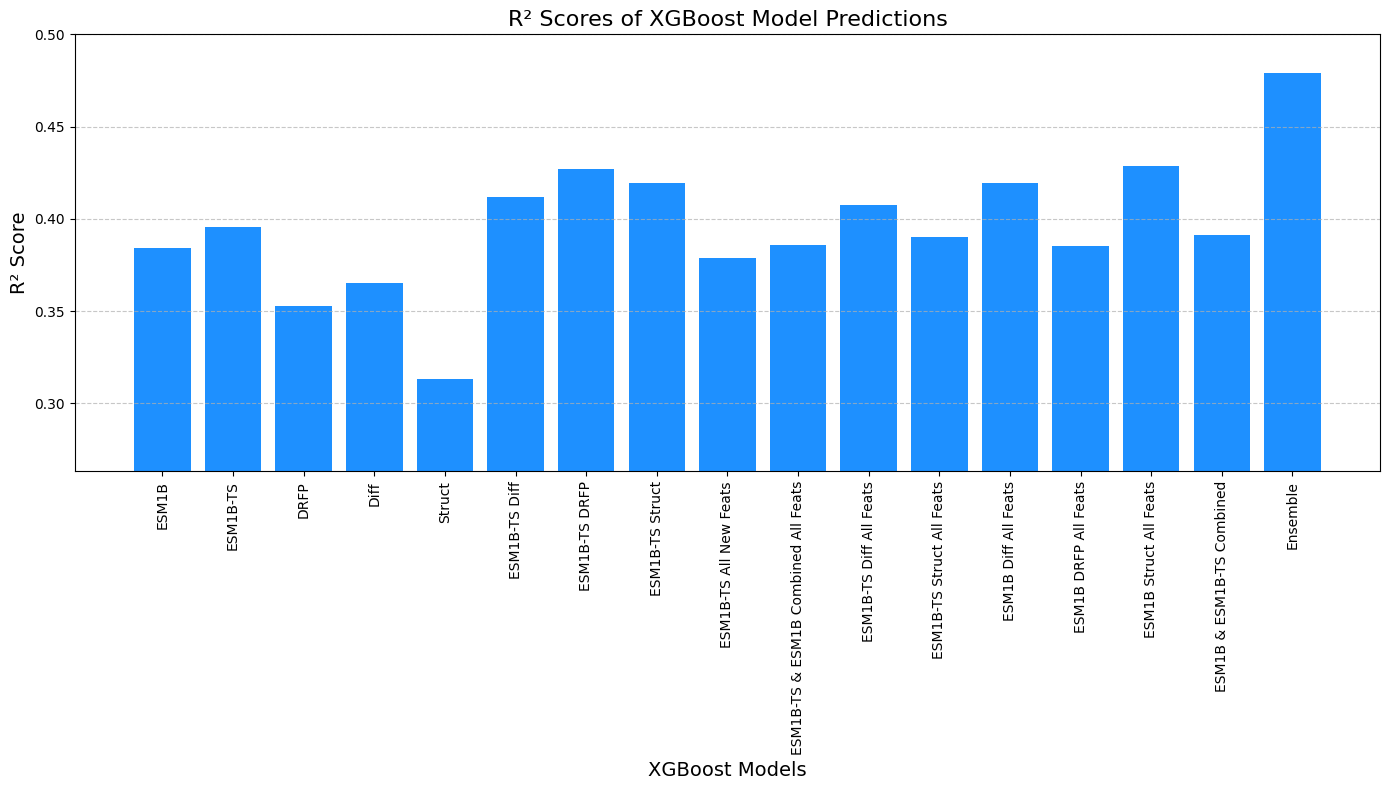

In [43]:
# Define the combined weighted predictions
combined_weighted_preds = np.array(
    [
        esm1b_preds, # 0.38
        esm1bts_preds, # 0.4
        drfp_preds, # 0.35
        diff_preds, # 0.36
        struct_preds, # 0.31
        esm1bts_diff_preds, # 0.41
        esm1bts_drfp_preds, # 0.43
        esm1bts_struct_preds, # 0.42
        esm1bts_all_new_feats_preds, # 0.38
        esm1bts_esm1b_combined_all_feats_preds, # 0.39
        esm1bts_diff_all_feats_preds, # 0.41
        esm1bts_struct_all_feats_preds, # 0.39
        esm1b_diff_all_feats_preds, # 0.42
        esm1b_drfp_all_feats_preds, # 0.39
        esm1b_struct_all_feats_preds, # 0.43
        esm1b_esm1bts_combined_preds, # 0.39
    ]
)

model_names = [
    "ESM1B",  # 0.38
    "ESM1B-TS",  # 0.4
    "DRFP",  # 0.35
    "Diff",  # 0.36
    "Struct",  # 0.31
    "ESM1B-TS Diff",  # 0.41
    "ESM1B-TS DRFP",  # 0.43
    "ESM1B-TS Struct",  # 0.42
    "ESM1B-TS All New Feats",  # 0.38
    "ESM1B-TS & ESM1B Combined All Feats",  # 0.39
    "ESM1B-TS Diff All Feats",  # 0.41
    "ESM1B-TS Struct All Feats",  # 0.39
    "ESM1B Diff All Feats",  # 0.42
    "ESM1B DRFP All Feats",  # 0.39
    "ESM1B Struct All Feats",  # 0.43
    "ESM1B & ESM1B-TS Combined",  # 0.39
    "Ensemble"
]


# Calculate the ground truth
ground_truth = data_test["log10_kcat"]
weighted_avg_pred = calculate_weighted_mean(combined_weighted_preds, ground_truth)

r2_scores = [r2_score(ground_truth, preds) for preds in combined_weighted_preds]

r2_scores.append(r2_score(ground_truth,  weighted_avg_pred))

# Plotting
plt.figure(figsize=(14, 8))
plt.bar(model_names, r2_scores, color='dodgerblue')
plt.xlabel('XGBoost Models', fontsize=14)
plt.ylabel('R² Score', fontsize=14)
plt.xticks(rotation=90)
plt.title('R² Scores of XGBoost Model Predictions', fontsize=16)
plt.ylim([min(r2_scores) - 0.05, 0.50])  # Adjust y-axis limits
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


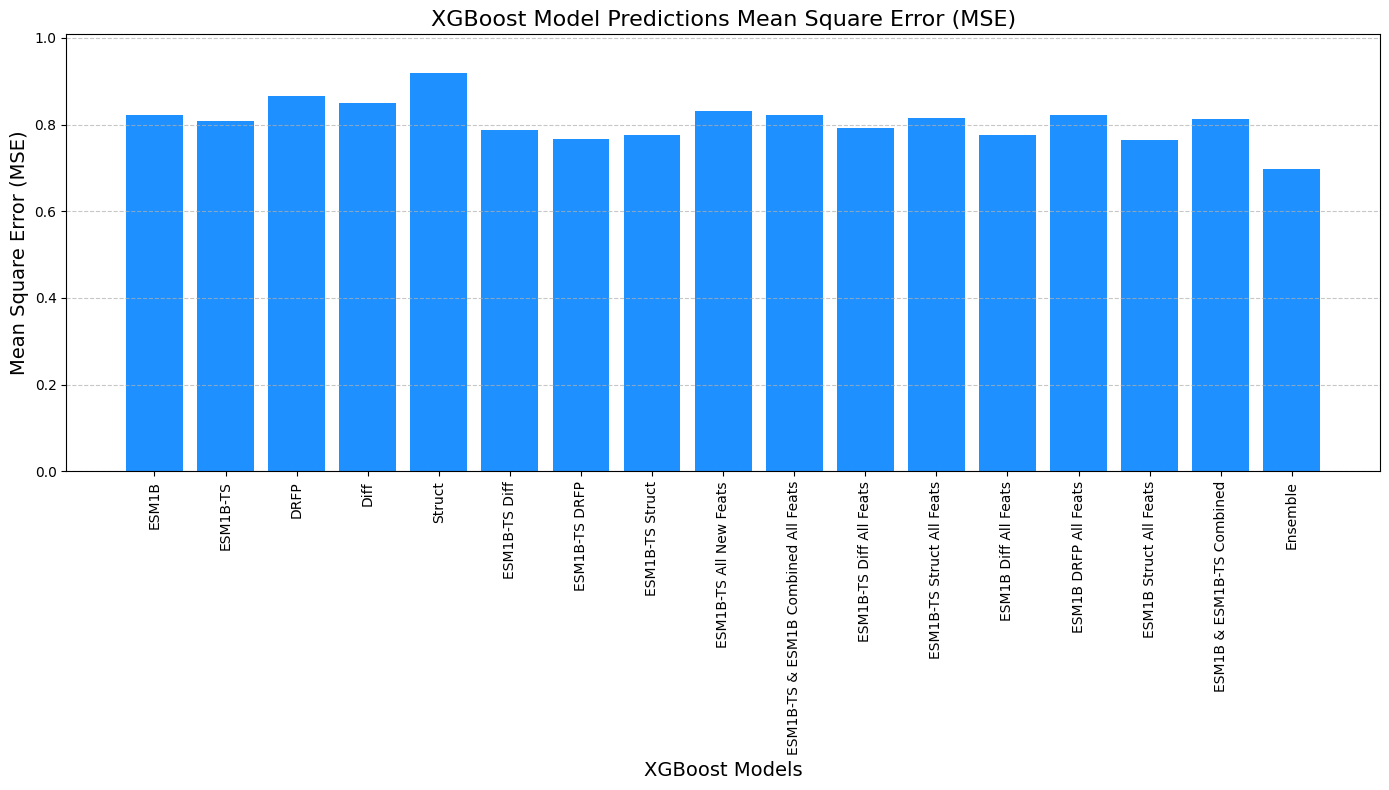

In [44]:
combined_weighted_preds = np.array(
    [
        esm1b_preds, # 0.38
        esm1bts_preds, # 0.4
        drfp_preds, # 0.35
        diff_preds, # 0.36
        struct_preds, # 0.31
        esm1bts_diff_preds, # 0.41
        esm1bts_drfp_preds, # 0.43
        esm1bts_struct_preds, # 0.42
        esm1bts_all_new_feats_preds, # 0.38
        esm1bts_esm1b_combined_all_feats_preds, # 0.39
        esm1bts_diff_all_feats_preds, # 0.41
        esm1bts_struct_all_feats_preds, # 0.39
        esm1b_diff_all_feats_preds, # 0.42
        esm1b_drfp_all_feats_preds, # 0.39
        esm1b_struct_all_feats_preds, # 0.43
        esm1b_esm1bts_combined_preds, # 0.39
    ]
)

model_names = [
    "ESM1B",  # 0.38
    "ESM1B-TS",  # 0.4
    "DRFP",  # 0.35
    "Diff",  # 0.36
    "Struct",  # 0.31
    "ESM1B-TS Diff",  # 0.41
    "ESM1B-TS DRFP",  # 0.43
    "ESM1B-TS Struct",  # 0.42
    "ESM1B-TS All New Feats",  # 0.38
    "ESM1B-TS & ESM1B Combined All Feats",  # 0.39
    "ESM1B-TS Diff All Feats",  # 0.41
    "ESM1B-TS Struct All Feats",  # 0.39
    "ESM1B Diff All Feats",  # 0.42
    "ESM1B DRFP All Feats",  # 0.39
    "ESM1B Struct All Feats",  # 0.43
    "ESM1B & ESM1B-TS Combined",  # 0.39
    "Ensemble"
]


# Calculate the ground truth
ground_truth = data_test["log10_kcat"]


# Calculate MSE for each set of predictions
mse_scores = [mean_squared_error(ground_truth, preds) for preds in combined_weighted_preds]

weighted_avg_pred = calculate_weighted_mean(combined_weighted_preds, ground_truth)
mse_scores.append(mean_squared_error(ground_truth, weighted_avg_pred))  # Including the ensemble prediction



# Plotting
plt.figure(figsize=(14, 8))
plt.bar(model_names, mse_scores, color='dodgerblue')
plt.xlabel('XGBoost Models', fontsize=14)
plt.ylabel('Mean Square Error (MSE)', fontsize=14)
plt.xticks(rotation=90)
plt.title('XGBoost Model Predictions Mean Square Error (MSE)', fontsize=16)
plt.ylim([0, max(mse_scores) + 0.09])  # Adjust y-axis limits to better fit the data
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Visualize prediction vs Ground-truth

In [27]:
%cd /content/drive/MyDrive/enz-eff-project/improved_code/model_training

import pandas as pd
import numpy as np
from os.path import join
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from xgboost_funs import calculate_weighted_mean


data_test = pd.read_pickle(
    join("..", "..", "data", "kcat_data", "splits", "test_df_kcat_new_feats.pkl")
)

data_test.rename(columns={"geomean_kcat": "log10_kcat"}, inplace=True)


test_X = [data_test["ESM1b"]]
test_Y = data_test["log10_kcat"]


/content/drive/.shortcut-targets-by-id/1iS6gSWfUE3cZnmrNWbbV9_W_zQH3vaiu/enz-eff-project/improved_code/model_training


In [28]:
%cd /content/drive/MyDrive/enz-eff-project/data/training_results


ensembed_preds_file = "xgboost_ensembled_preds.npy"

# Load the numpy array
(
        esm1b_preds, # 0.38
        esm1bts_preds, # 0.4
        drfp_preds, # 0.35
        diff_preds, # 0.36
        struct_preds, # 0.31
        esm1bts_diff_preds, # 0.41
        esm1bts_drfp_preds, # 0.43
        esm1bts_struct_preds, # 0.42
        esm1bts_all_new_feats_preds, # 0.38
        esm1bts_esm1b_combined_all_feats_preds, # 0.39
        esm1bts_diff_all_feats_preds, # 0.41
        esm1bts_struct_all_feats_preds, # 0.39
        esm1b_diff_all_feats_preds, # 0.42
        esm1b_drfp_all_feats_preds, # 0.39
        esm1b_struct_all_feats_preds, # 0.43
        esm1b_esm1bts_combined_preds, # 0.39
) = np.load(ensembed_preds_file)



/content/drive/.shortcut-targets-by-id/1iS6gSWfUE3cZnmrNWbbV9_W_zQH3vaiu/enz-eff-project/data/training_results


In [37]:
import matplotlib.pyplot as plt
import numpy as np


def plot_kcat_predictions_subplot(test_Y, single_model_predictions, ensemble_predictions):
    """
    Plot subplots of ground truth Kcat values against predicted values with enhanced visualization.

    Parameters:
    - test_Y (array-like): Ground truth Kcat values.
    - single_model_predictions (array-like): Predicted Kcat values of the single best model.
    - ensemble_predictions (array-like): Predicted Kcat values of the ensemble model.

    Returns:
    - None
    """
    fig, axes = plt.subplots(1, 2, figsize=(16, 5))

    # Plot for single best model
    axes[0].scatter(test_Y, single_model_predictions, alpha=0.5, color='blue', label='Predictions')
    identity_line = np.linspace(min(test_Y), max(test_Y), 100)
    axes[0].plot(identity_line, identity_line, 'r--', label='Perfect Prediction Line')

    axes[0].set_title('Single Best Model Predicted Kcat vs. Ground Truth')
    axes[0].set_xlabel('Ground Truth Kcat')
    axes[0].set_ylabel('XGBoost Single Best Model Predictions')
    axes[0].legend()
    axes[0].grid(True)

    # Plot for ensemble model
    axes[1].scatter(test_Y, ensemble_predictions, alpha=0.5, color='blue', label='Predictions')
    axes[1].plot(identity_line, identity_line, 'r--', label='Perfect Prediction Line')

    axes[1].set_title('Ensemble Predicted Kcat vs. Ground Truth')
    axes[1].set_xlabel('Ground Truth Kcat')
    axes[1].set_ylabel('XGBoost Ensemble Predictions')
    axes[1].legend()
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()



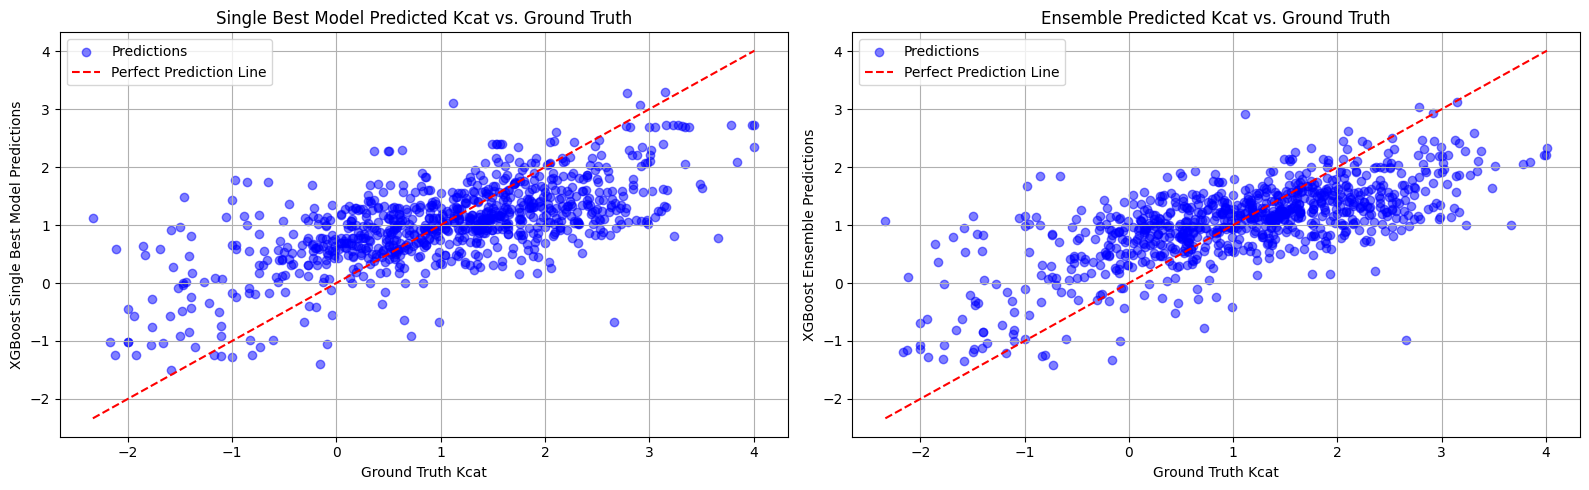

In [38]:
# with previous features only
combined_weighted_preds = np.array([
    drfp_preds,  # 0.35
    esm1bts_drfp_preds,  # 0.43
    esm1bts_struct_preds,  # 0.42
    esm1b_esm1bts_combined_preds,  # 0.39
])

ground_truth = np.array(list(test_Y))
single_best_model_preds = esm1bts_drfp_preds
weighted_avg_pred = calculate_weighted_mean(combined_weighted_preds, ground_truth)


plot_kcat_predictions_subplot(ground_truth, single_best_model_preds, weighted_avg_pred)

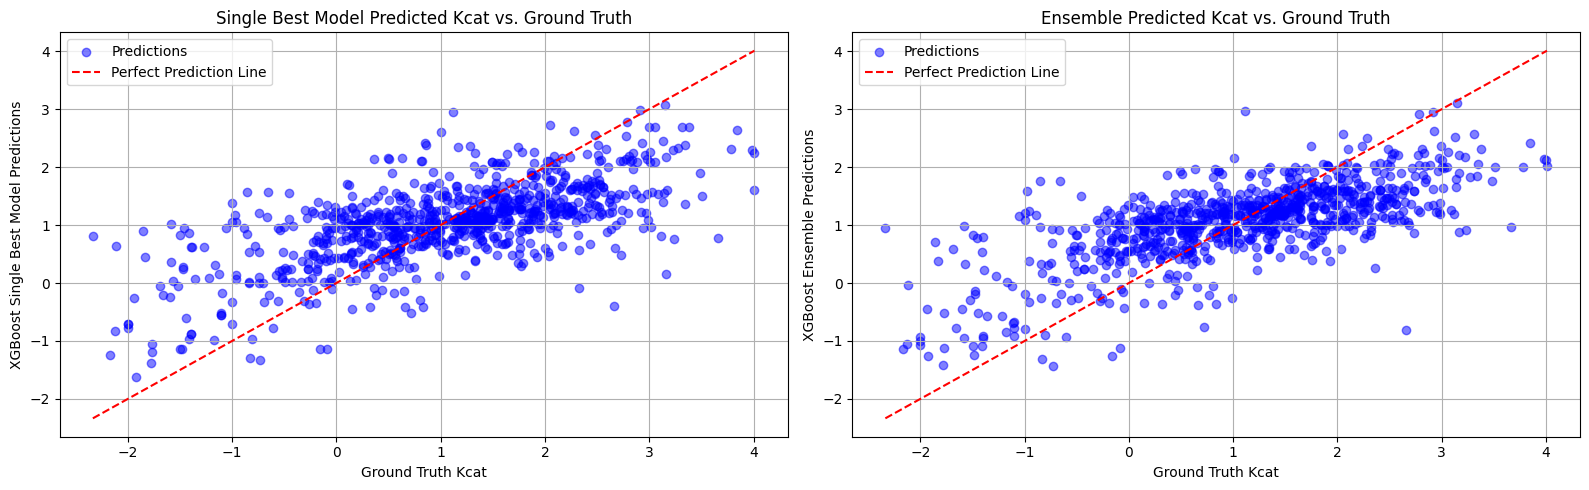

In [36]:
# with new features combine with previous features
combined_weighted_preds = np.array(
    [
        drfp_preds, # 0.35
        esm1bts_struct_preds, # 0.42
        esm1b_diff_all_feats_preds, # 0.42
        esm1b_struct_all_feats_preds, # 0.43

    ]
)

ground_truth = np.array(list(test_Y))
single_best_model_preds = esm1b_struct_all_feats_preds
weighted_avg_pred = calculate_weighted_mean(combined_weighted_preds, ground_truth)


plot_kcat_predictions_subplot(ground_truth, single_best_model_preds, weighted_avg_pred)
